# Analyses Détecteur de faux billets 

## 1 Préparation du fichier
### 1.1 Importation des librairies

In [1]:
#Importation de la librairie Pandas
import pandas as pd
#Importation de la librairie matplotlib
import matplotlib.pyplot as plt
#Importation de la librairie Numpy
import numpy as np
#Importation de la librairie seaborn
import seaborn as sns
#Importation de la librairie scipy
import scipy.stats as stats
from scipy.stats import shapiro
#Importation de la librairie sklearn.model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

### 1.2 Importation du fichier

In [2]:
#Importation du fichier billets
df_billets = pd.read_csv('billets.csv')

### 1.3 Analyse du fichier

In [3]:
#Afficher les dimensions du fichier
print("Le tableau comporte {} observation(s) ou article(s)".format(df_billets.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_billets.shape[1]))

#La nature des données dans chacune des colonnes
print(df_billets.dtypes)

Le tableau comporte 1500 observation(s) ou article(s)
Le tableau comporte 1 colonne(s)
is_genuine;diagonal;height_left;height_right;margin_low;margin_up;length    object
dtype: object


In [4]:
# Diviser la colonne en 7 nouvelles colonnes
df_billets[['is_genuine', 'diagonal', 'height_left','height_right','margin_low','margin_up','length']] = df_billets['is_genuine;diagonal;height_left;height_right;margin_low;margin_up;length'].str.split(';', expand=True)
# Supprimer la première colonne (colonne_originale)
df_billets = df_billets.drop(columns=['is_genuine;diagonal;height_left;height_right;margin_low;margin_up;length'])
#Affichage les 5 premières lignes de la table
df_billets.head(5)

is_genuine diagonal height_left height_right margin_low margin_up  length
0       True   171.81      104.86       104.95       4.52      2.89  112.83
1       True   171.46      103.36       103.66       3.77      2.99  113.09
2       True   172.69      104.48        103.5        4.4      2.94  113.16
3       True   171.36      103.91       103.94       3.62      3.01  113.51
4       True   171.73      104.28       103.46       4.04      3.48  112.54

In [5]:
#Le nombre de valeurs présentes dans chacune des colonnes
print("Nombre de Valeurs présentes dans chacune des colonnes")
print(df_billets.count())

Nombre de Valeurs présentes dans chacune des colonnes
is_genuine      1500
diagonal        1500
height_left     1500
height_right    1500
margin_low      1500
margin_up       1500
length          1500
dtype: int64


In [6]:
#Verification du format des colonnes
df_billets.dtypes

is_genuine      object
diagonal        object
height_left     object
height_right    object
margin_low      object
margin_up       object
length          object
dtype: object

In [7]:
# Normalisation + convertion du type des colonnes en float
colonnes_a_convertir = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']

# Supprimer les espaces dans les noms de colonnes
df_billets.columns = df_billets.columns.str.strip()

# Nettoyer et convertir
for col in colonnes_a_convertir:
    df_billets[col] = (
        df_billets[col]
        .astype(str)                          # convertir tout en texte pour bien nettoyer
        .str.replace(',', '.', regex=False)    # remplacer les virgules par des points
        .str.strip()                           # enlever les espaces
    )
    df_billets[col] = pd.to_numeric(df_billets[col], errors='coerce')  # transformer en float proprement

#Vérification type colonnes
df_billets.dtypes

is_genuine       object
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

In [8]:
#vérification de Nan dans le df_billets
df_billets.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [9]:
# Filtrer les lignes où margin_low est manquant
df_na_margin = df_billets[df_billets['margin_low'].isna()]
# Afficher les types de billets 'in_genius' correspondantes
billets_na_in_genuine = df_na_margin['is_genuine'].value_counts(dropna=False)

print(billets_na_in_genuine)

is_genuine
True     29
False     8
Name: count, dtype: int64


### 1.4 Analyse des données

In [10]:
# Compter les occurrences dans la variable is_genuine
compte_valeurs = df_billets['is_genuine'].value_counts()

print(compte_valeurs)

is_genuine
True     1000
False     500
Name: count, dtype: int64


In [11]:
#Vérification diagonal: 
#Afficher le prix minimum de la colonne "diagonal"
print("Le minimum de la colonne 'diagonal' est : {}".format(df_billets['diagonal'].min()))
#Afficher le prix maximum de la colonne "diagonal"
print("Le maximum de la colonne 'diagonal' est : {}".format(df_billets['diagonal'].max()))

Le minimum de la colonne 'diagonal' est : 171.04
Le maximum de la colonne 'diagonal' est : 173.01


In [12]:
#Vérification height_left      : 
#Afficher le prix minimum de la colonne "height_left      "
print("Le minimum de la colonne 'height_left' est : {}".format(df_billets['height_left'].min()))
#Afficher le prix maximum de la colonne "height_left      "
print("Le maximum de la colonne 'height_left' est : {}".format(df_billets['height_left'].max()))

Le minimum de la colonne 'height_left' est : 103.14
Le maximum de la colonne 'height_left' est : 104.88


In [13]:
#Vérification height_right      : 
#Afficher le prix minimum de la colonne "height_left      "
print("Le minimum de la colonne 'height_right' est : {}".format(df_billets['height_right'].min()))
#Afficher le prix maximum de la colonne "height_left      "
print("Le maximum de la colonne 'height_right' est : {}".format(df_billets['height_right'].max()))

Le minimum de la colonne 'height_right' est : 102.82
Le maximum de la colonne 'height_right' est : 104.95


In [14]:
#Vérification margin_low      : 
#Afficher le prix minimum de la colonne "margin_low      "
print("Le minimum de la colonne 'margin_low' est : {}".format(df_billets['margin_low'].min()))
#Afficher le prix maximum de la colonne "margin_low      "
print("Le maximum de la colonne 'margin_low' est : {}".format(df_billets['margin_low'].max()))

Le minimum de la colonne 'margin_low' est : 2.98
Le maximum de la colonne 'margin_low' est : 6.9


" Absence de 37 élements "

In [15]:
#Vérification margin_up      : 
#Afficher le prix minimum de la colonne "margin_up      "
print("Le minimum de la colonne 'margin_up' est : {}".format(df_billets['margin_up'].min()))
#Afficher le prix maximum de la colonne "margin_up      "
print("Le maximum de la colonne 'margin_up' est : {}".format(df_billets['margin_up'].max()))

Le minimum de la colonne 'margin_up' est : 2.27
Le maximum de la colonne 'margin_up' est : 3.91


In [16]:
#Vérification length      : 
#Afficher le prix minimum de la colonne "length      "
print("Le minimum de la colonne 'length' est : {}".format(df_billets['length'].min()))
#Afficher le prix maximum de la colonne "length      "
print("Le maximum de la colonne 'length' est : {}".format(df_billets['length'].max()))

Le minimum de la colonne 'length' est : 109.49
Le maximum de la colonne 'length' est : 114.44


## 2. Analyse des variables

Présence d'une variable qualitatif et de 6 variables quantitatives

### 2.1 Analyse Univariées

In [17]:
df_billets.describe()

diagonal  height_left  height_right   margin_low    margin_up  \
count  1500.000000  1500.000000   1500.000000  1463.000000  1500.000000   
mean    171.958440   104.029533    103.920307     4.485967     3.151473   
std       0.305195     0.299462      0.325627     0.663813     0.231813   
min     171.040000   103.140000    102.820000     2.980000     2.270000   
25%     171.750000   103.820000    103.710000     4.015000     2.990000   
50%     171.960000   104.040000    103.920000     4.310000     3.140000   
75%     172.170000   104.230000    104.150000     4.870000     3.310000   
max     173.010000   104.880000    104.950000     6.900000     3.910000   

           length  
count  1500.00000  
mean    112.67850  
std       0.87273  
min     109.49000  
25%     112.03000  
50%     112.96000  
75%     113.34000  
max     114.44000

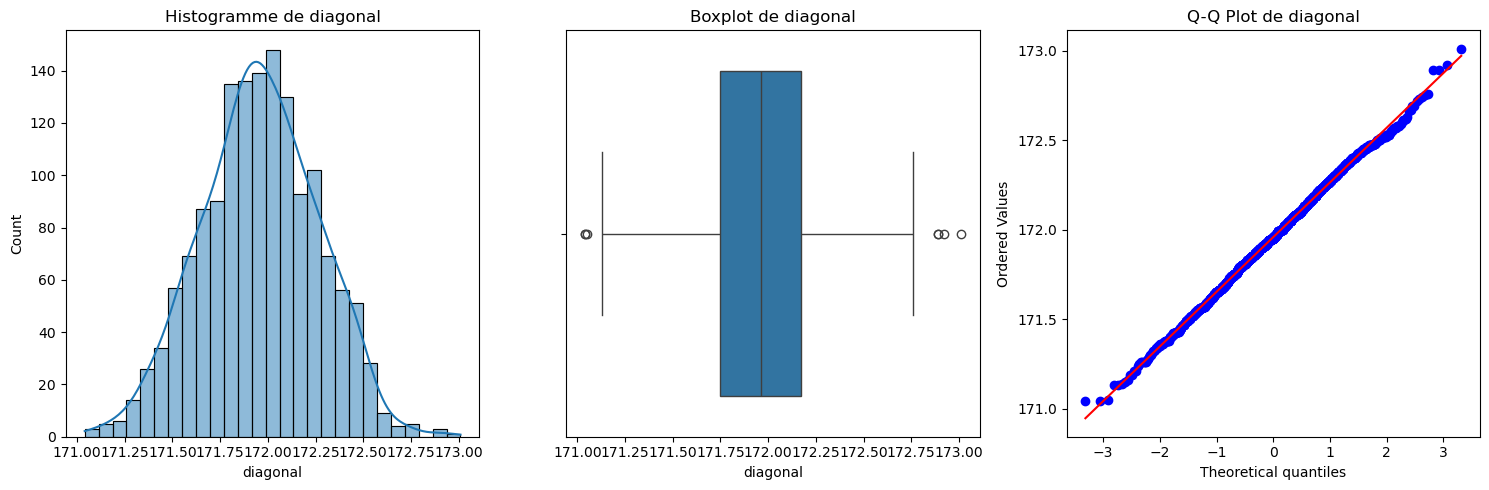

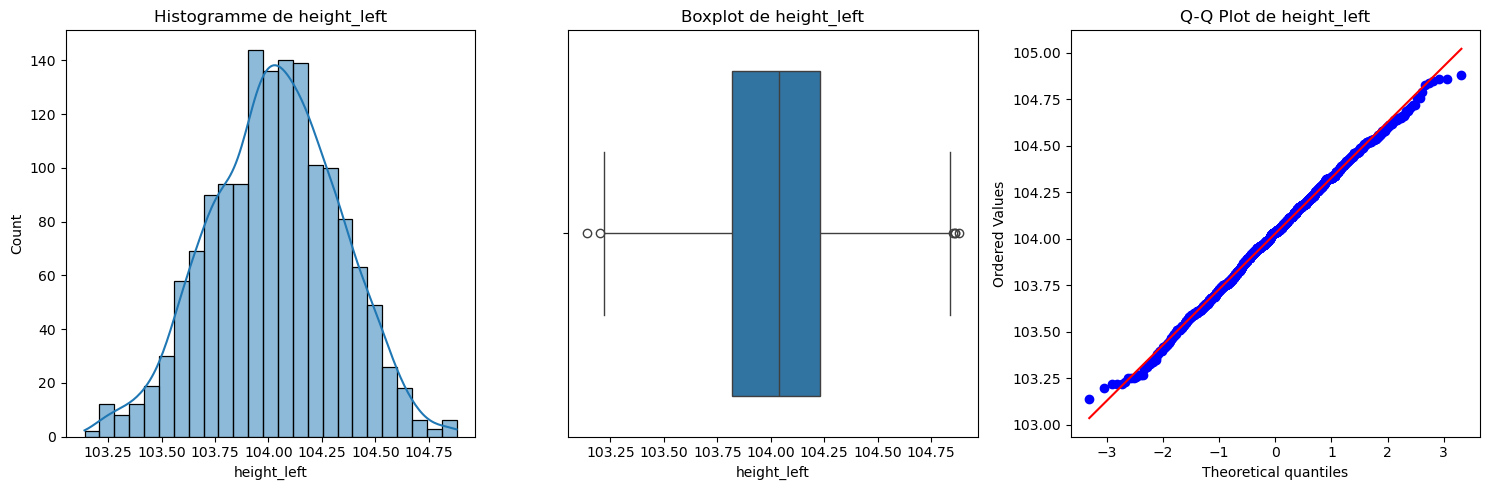

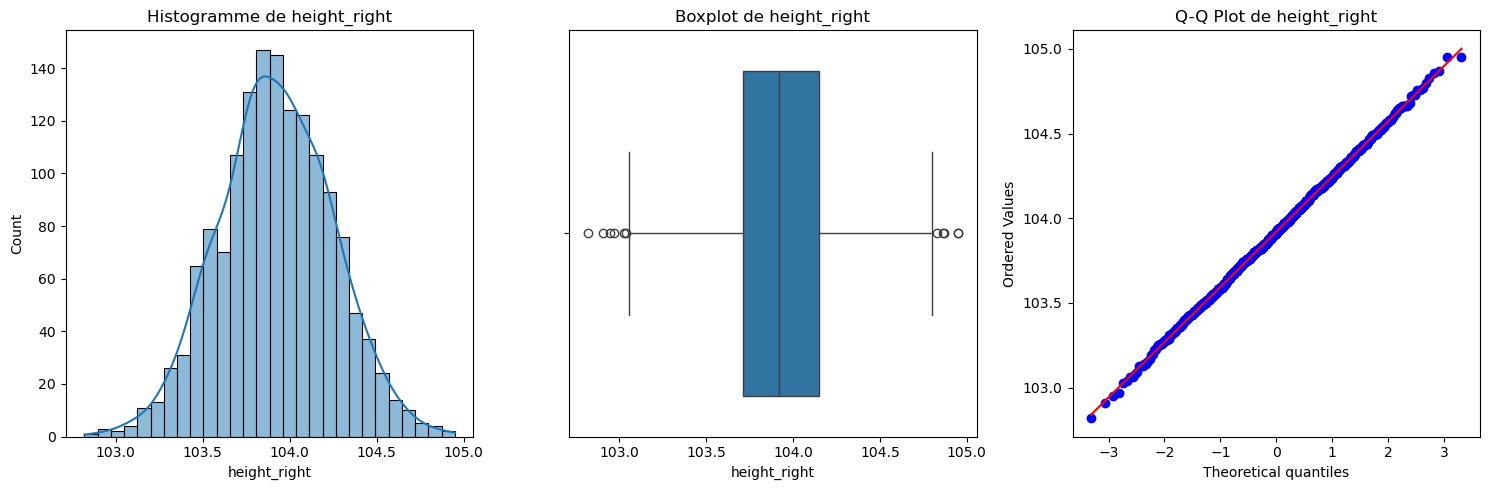

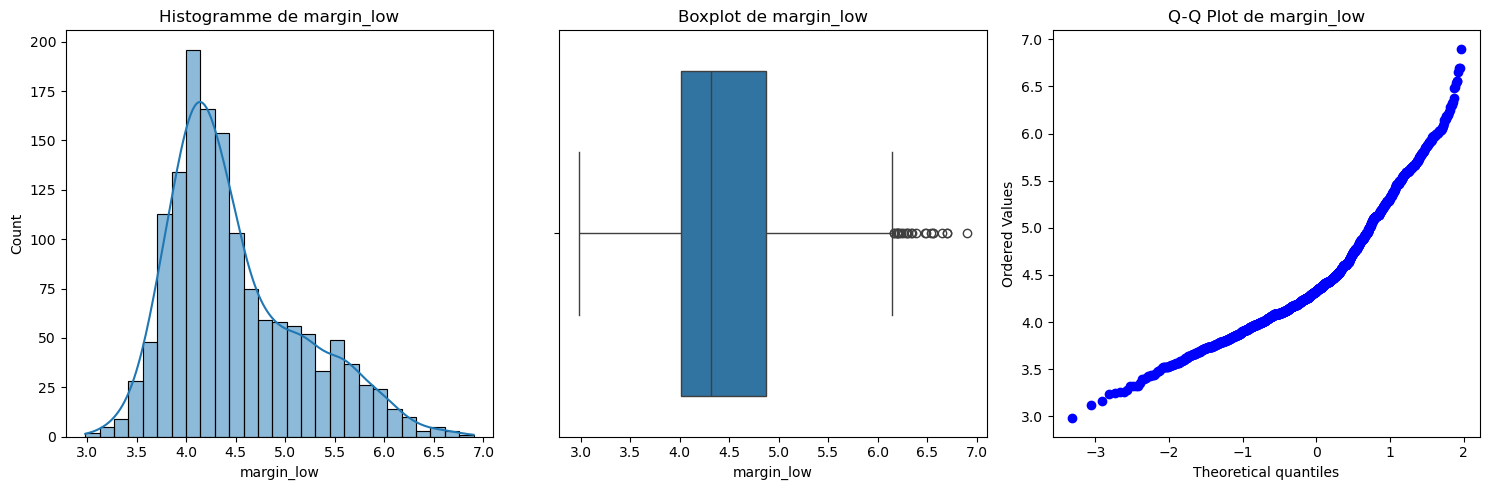

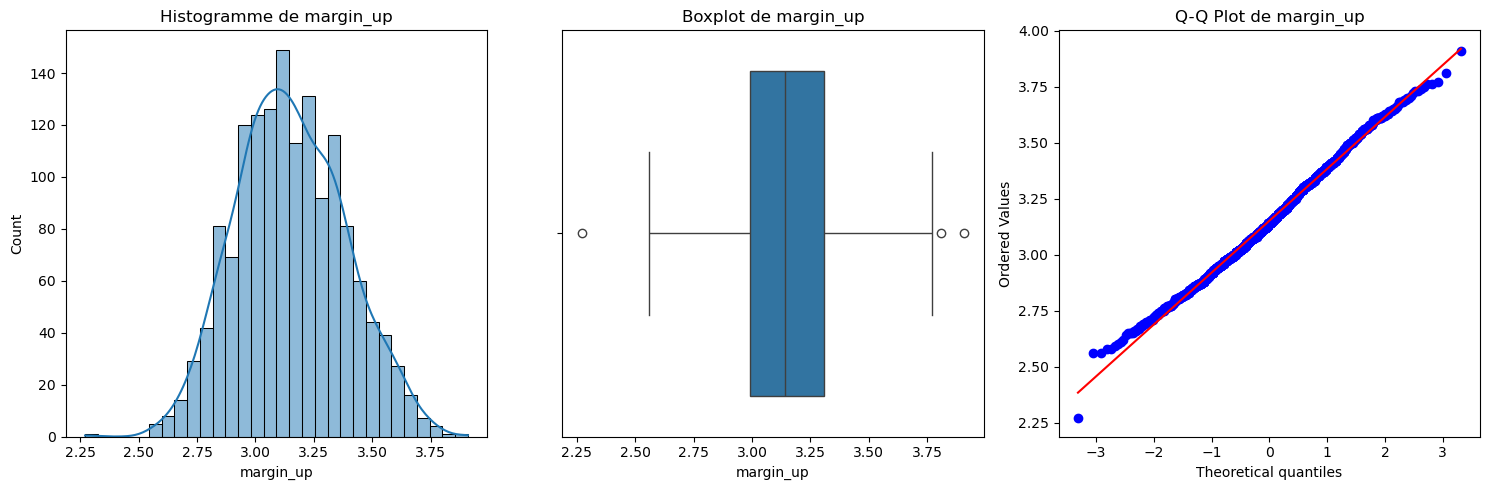

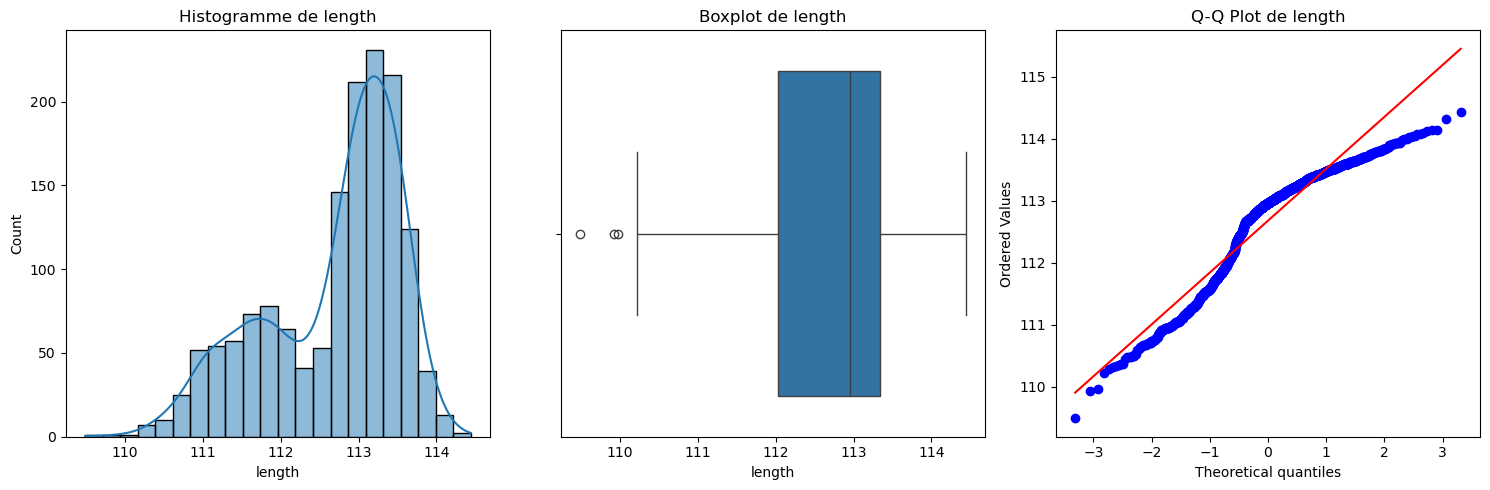

In [18]:
#Visualisation de chaque variable Histogramme, Boxplot, Q-Q plot + normalité
for colonne in colonnes_a_convertir:
    plt.figure(figsize=(15, 5))
    
    # Histogramme
    plt.subplot(1, 3, 1)
    sns.histplot(df_billets[colonne], kde=True)
    plt.title(f"Histogramme de {colonne}")
    
    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df_billets[colonne])
    plt.title(f"Boxplot de {colonne}")
    
    # Q-Q plot
    plt.subplot(1, 3, 3)
    stats.probplot(df_billets[colonne], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot de {colonne}")
    
    plt.tight_layout()
    plt.show()

In [19]:

for colonne in colonnes_a_convertir:
    stat, p = shapiro(df_billets[colonne].dropna())  # Important : enlever les NaN
    print(f"Test de Shapiro pour {colonne} :")
    print(f"Statistique = {stat:.4f}, p-value = {p:.4f}")
    if p < 0.05:
        print("=> Les données NE suivent PAS une loi normale (rejeter H0)\n")
    else:
        print("=> Les données SUIVENT une loi normale (ne pas rejeter H0)\n")


Test de Shapiro pour diagonal :
Statistique = 0.9987, p-value = 0.3241
=> Les données SUIVENT une loi normale (ne pas rejeter H0)

Test de Shapiro pour height_left :
Statistique = 0.9979, p-value = 0.0514
=> Les données SUIVENT une loi normale (ne pas rejeter H0)

Test de Shapiro pour height_right :
Statistique = 0.9995, p-value = 0.9800
=> Les données SUIVENT une loi normale (ne pas rejeter H0)

Test de Shapiro pour margin_low :
Statistique = 0.9378, p-value = 0.0000
=> Les données NE suivent PAS une loi normale (rejeter H0)

Test de Shapiro pour margin_up :
Statistique = 0.9962, p-value = 0.0008
=> Les données NE suivent PAS une loi normale (rejeter H0)

Test de Shapiro pour length :
Statistique = 0.9176, p-value = 0.0000
=> Les données NE suivent PAS une loi normale (rejeter H0)



" On s apercoit que :
Loi Normale: diagonal , height_left  , height_right 
Loi non normale : margin_low , margin_up , length 

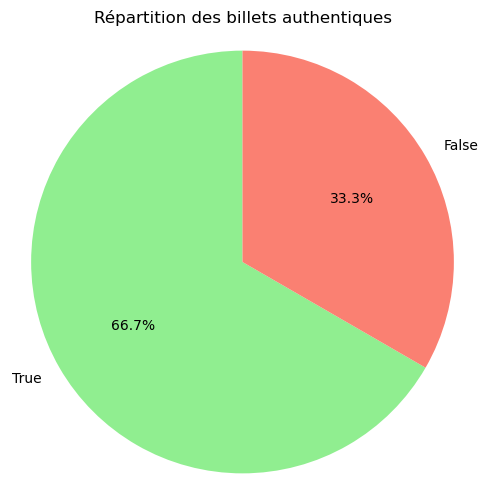

In [20]:
#Visualiasation de la valeur 'is_genuine'
# Compter les valeurs
valeurs = df_billets['is_genuine'].value_counts()

# Créer le camembert
plt.figure(figsize=(6, 6))
plt.pie(valeurs, labels=valeurs.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon'])
plt.title("Répartition des billets authentiques")
plt.axis('equal')  # Pour que ce soit bien rond
plt.show()


In [21]:
# Sélectionner uniquement les colonnes numériques
df_numerique = df_billets.select_dtypes(include='number')

# Corrélation Pearson
correlation_pearson = df_numerique.corr()

# Corrélation Spearman
correlation_spearman = df_numerique.corr(method='spearman')


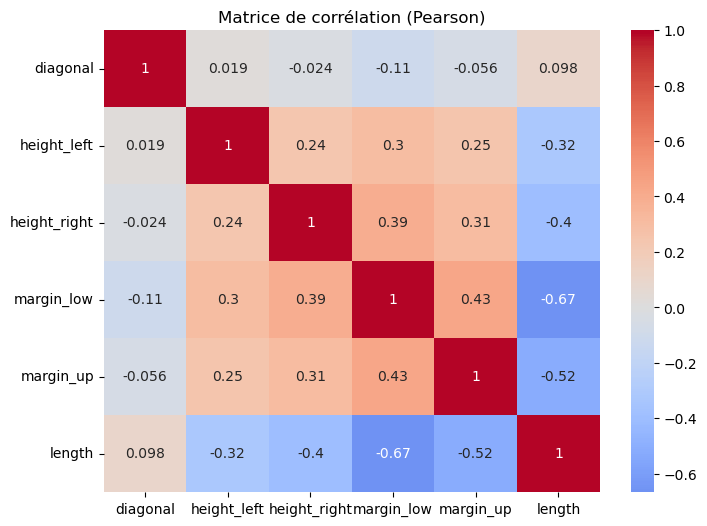

In [22]:
#Visualisation des variables avec heatmap "Loi normal"
plt.figure(figsize=(8,6))
sns.heatmap(correlation_pearson, annot=True, cmap='coolwarm', center=0)
plt.title("Matrice de corrélation (Pearson)")
plt.show()


"Il n'y a pas de forte correlation"

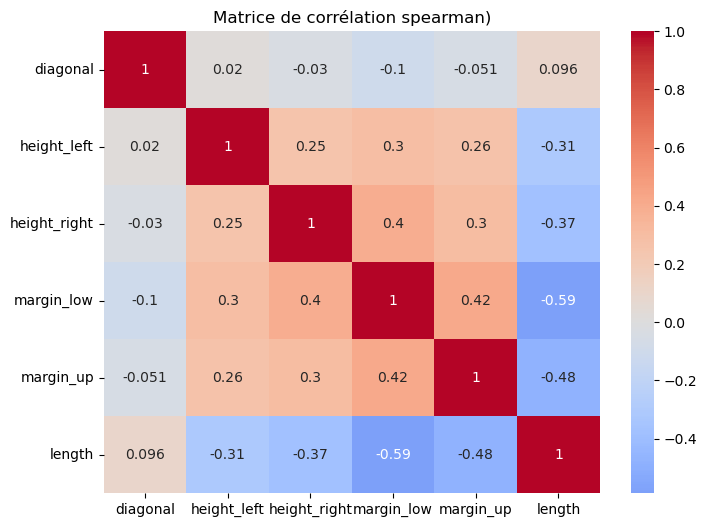

In [23]:
#Visualisation des variables avec heatmap " Loi non normal"
plt.figure(figsize=(8,6))
sns.heatmap(correlation_spearman, annot=True, cmap='coolwarm', center=0)
plt.title("Matrice de corrélation spearman)")
plt.show()

"Il n'y a pas de forte correlation"

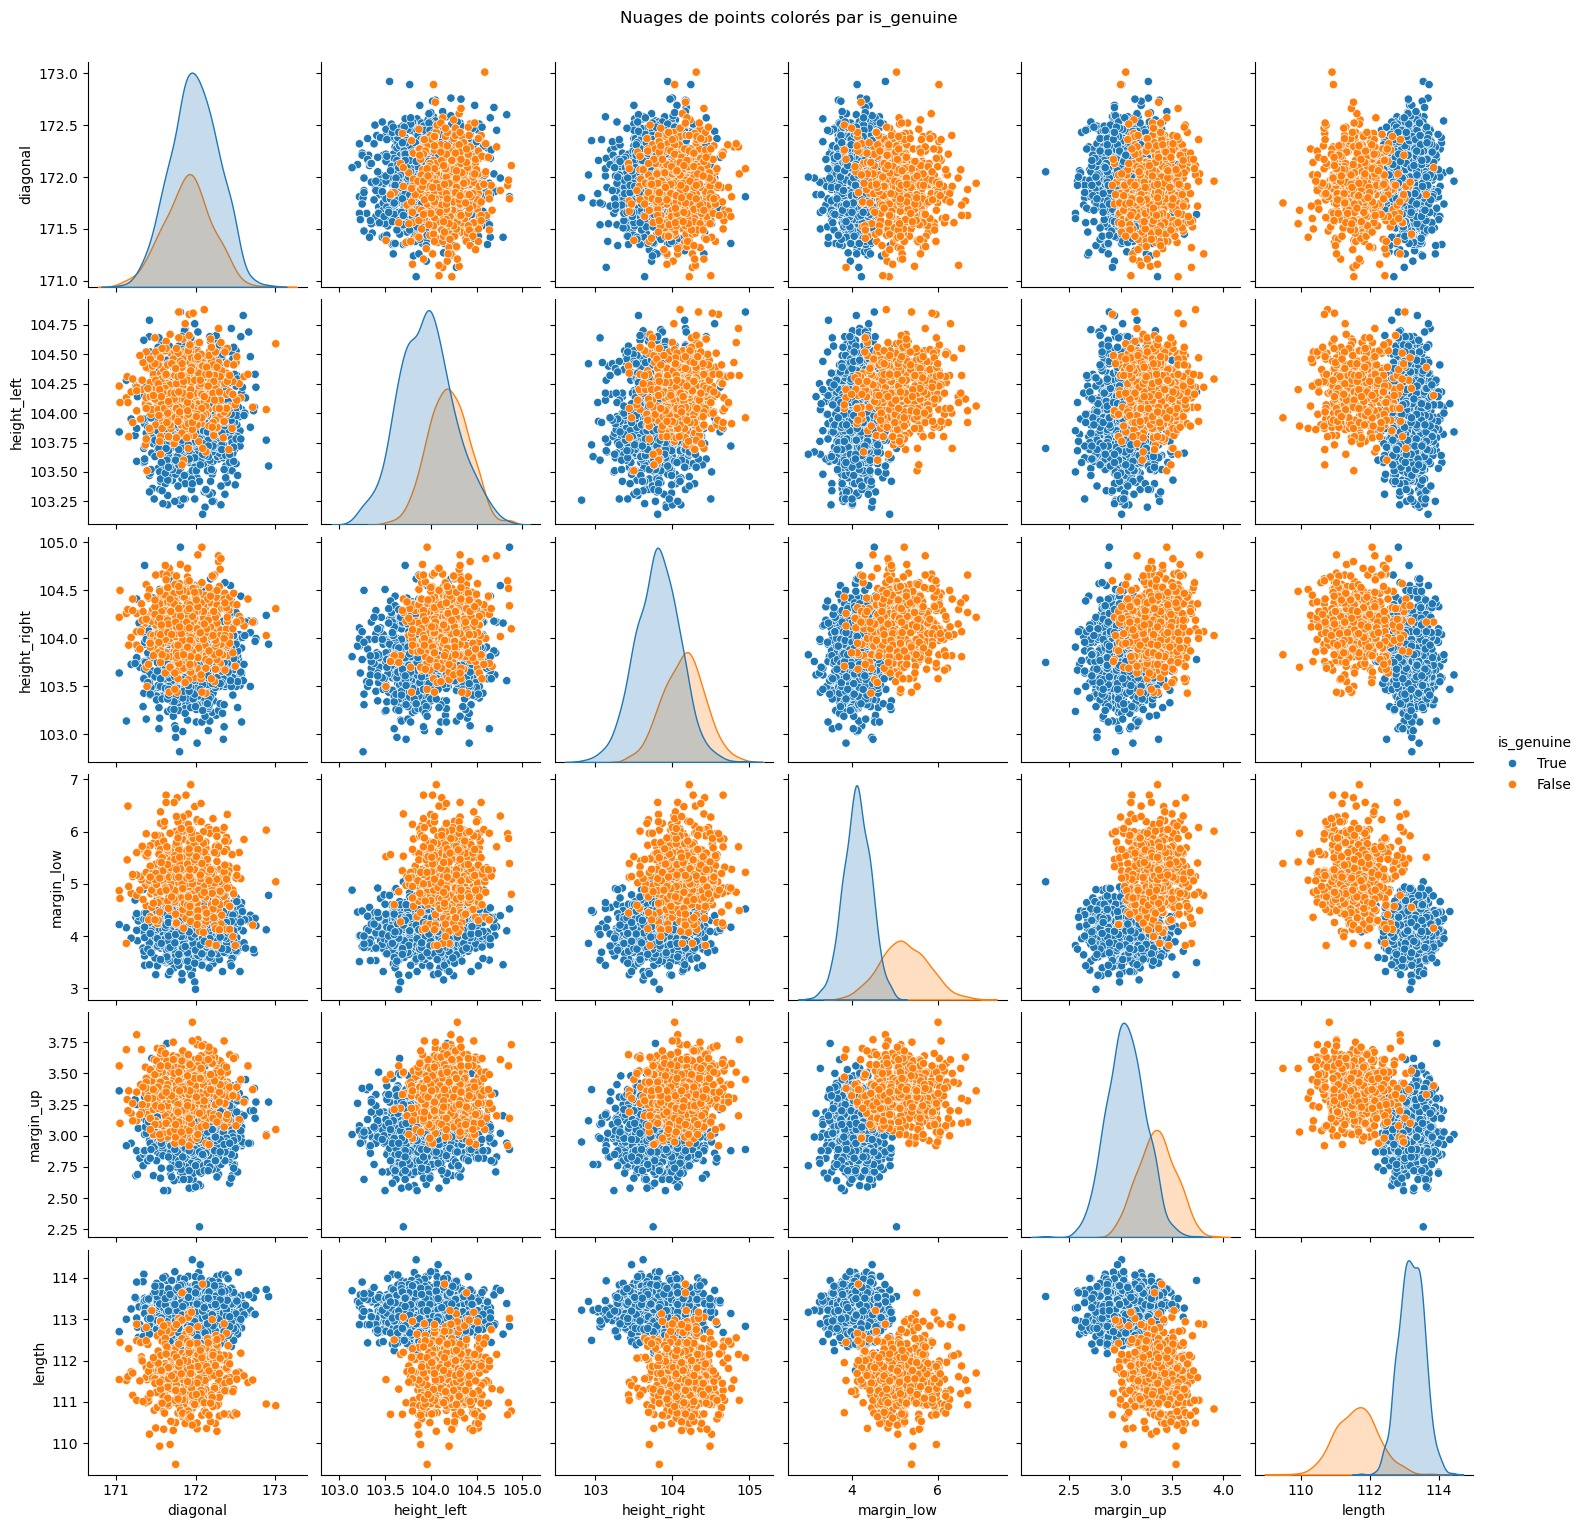

In [24]:
#Visualisation avec des nuages a points de la valeur qualitatif par rapport au varaibles
# Créer la matrice de nuages de points
sns.pairplot(df_billets, hue='is_genuine', diag_kind='kde')  # ou diag_kind='hist'
plt.suptitle("Nuages de points colorés par is_genuine", y=1.02)
plt.show()

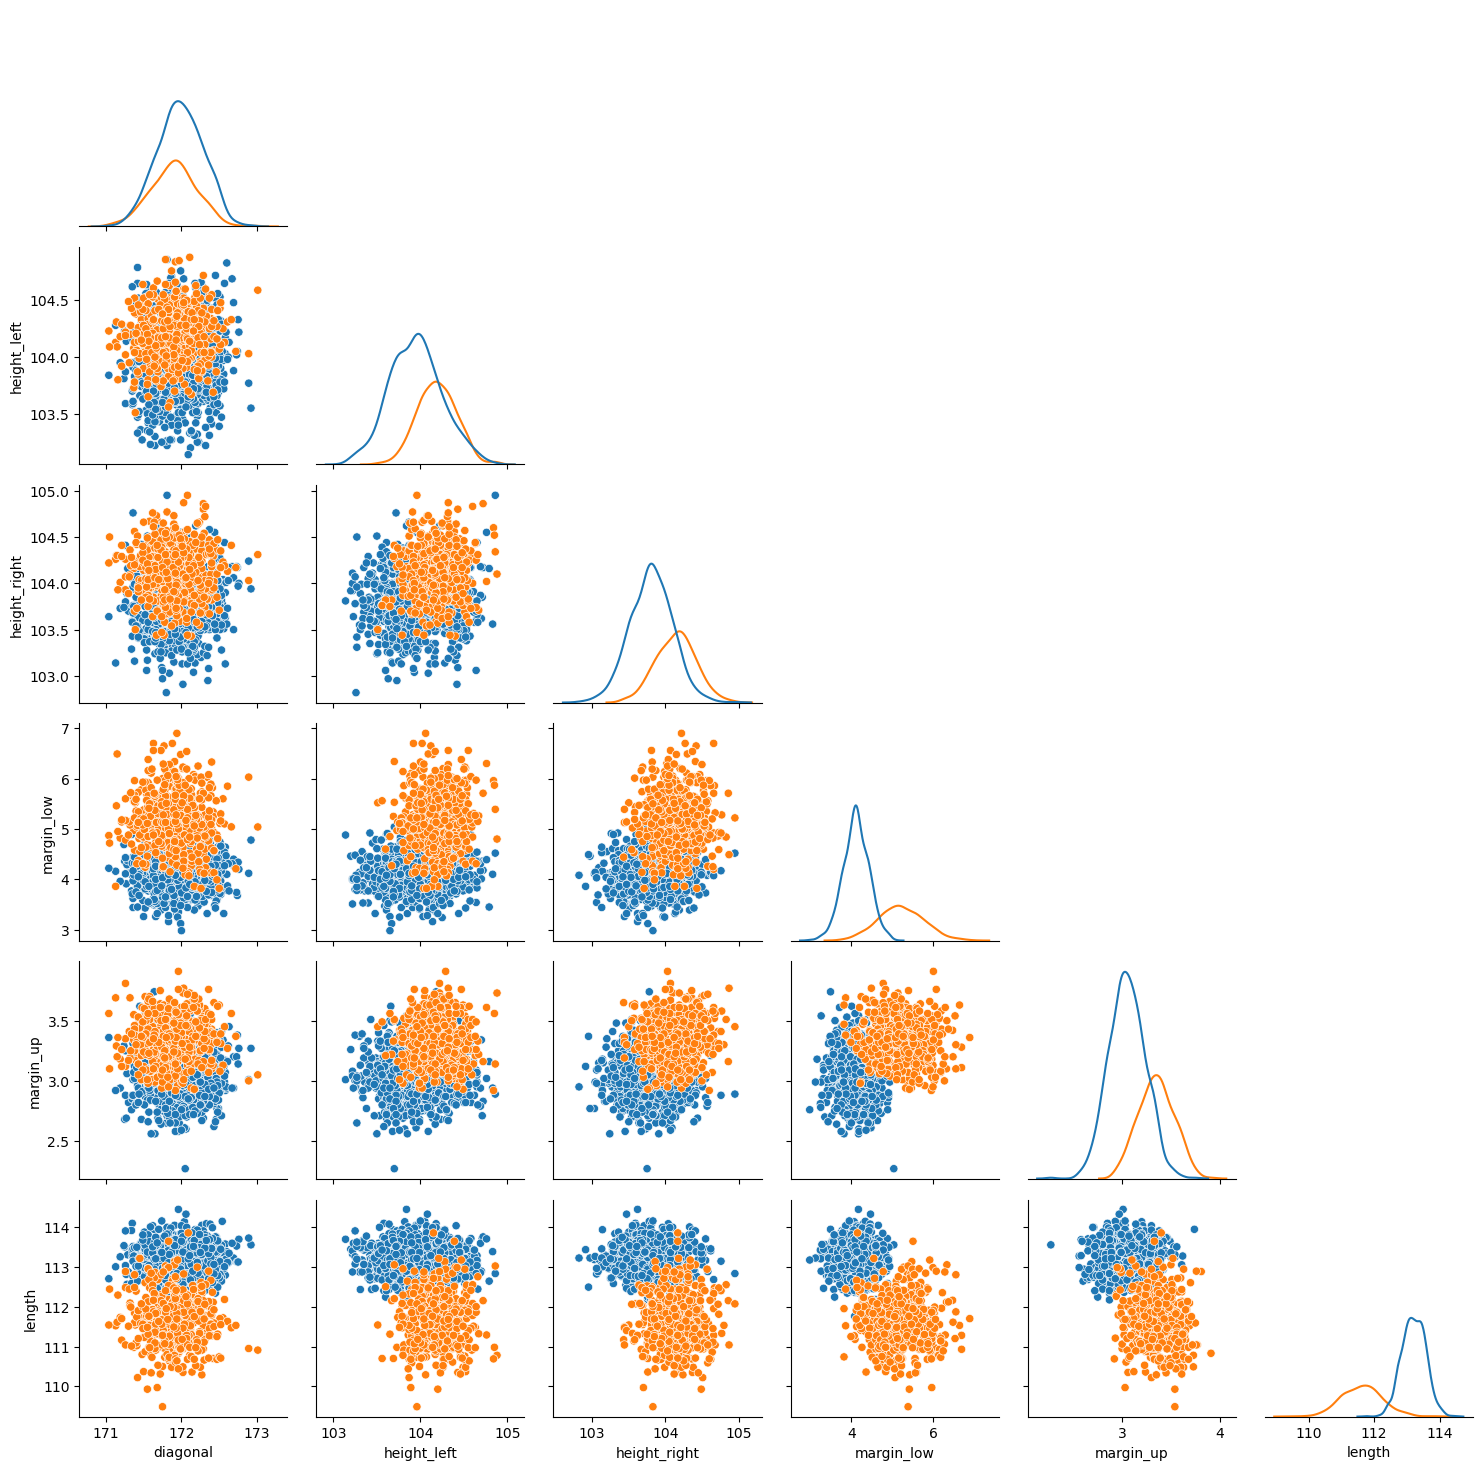

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Création de la grille personnalisée
g = sns.PairGrid(df_billets, hue='is_genuine', corner=True)  # corner=True = moitié inférieure uniquement

# Ajout des nuages de points
g.map_lower(sns.scatterplot)

# Diagonale (facultative) : KDE ou histo
g.map_diag(sns.kdeplot)

# Légende et titre
plt.show()


C:\Users\damie\AppData\Local\Temp\ipykernel_16252\1295227325.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_billets, x='is_genuine', y=col, palette=palette)


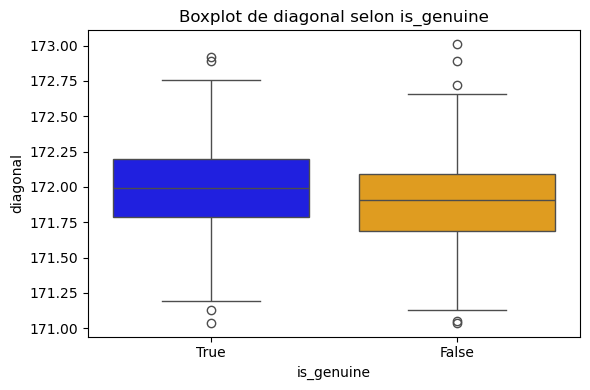

C:\Users\damie\AppData\Local\Temp\ipykernel_16252\1295227325.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_billets, x='is_genuine', y=col, palette=palette)


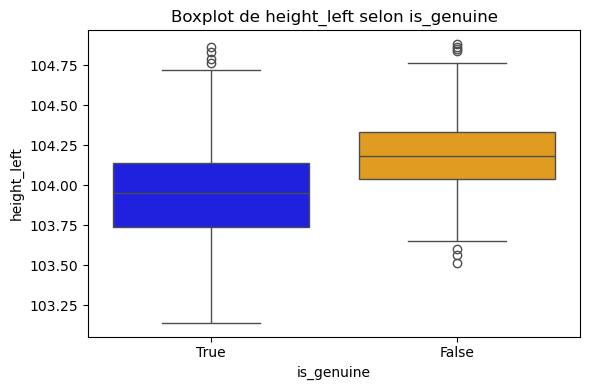

C:\Users\damie\AppData\Local\Temp\ipykernel_16252\1295227325.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_billets, x='is_genuine', y=col, palette=palette)


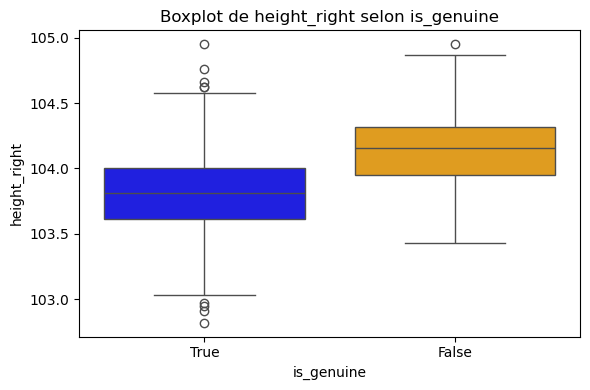

C:\Users\damie\AppData\Local\Temp\ipykernel_16252\1295227325.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_billets, x='is_genuine', y=col, palette=palette)


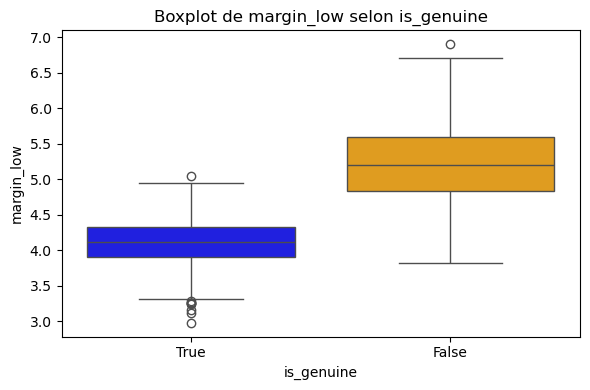

C:\Users\damie\AppData\Local\Temp\ipykernel_16252\1295227325.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_billets, x='is_genuine', y=col, palette=palette)


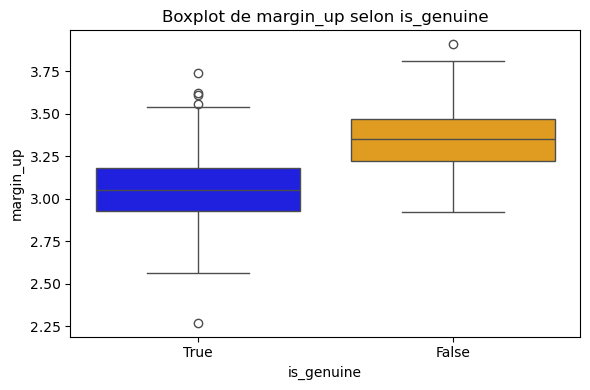

C:\Users\damie\AppData\Local\Temp\ipykernel_16252\1295227325.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_billets, x='is_genuine', y=col, palette=palette)


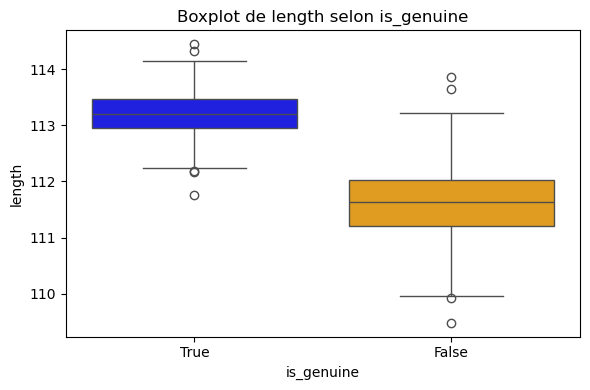

In [76]:
# Palette de couleurs fixe
palette = {'True': 'blue', 'False': 'orange'}

# Boucle sur les variables
for col in colonnes_a_convertir:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_billets, x='is_genuine', y=col, palette=palette)
    plt.title(f"Boxplot de {col} selon is_genuine")
    plt.tight_layout()
    plt.show()

C:\Users\damie\AppData\Local\Temp\ipykernel_16252\2388916100.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_billets, x='is_genuine', y=col, palette=palette, ax=axes[i])
C:\Users\damie\AppData\Local\Temp\ipykernel_16252\2388916100.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_billets, x='is_genuine', y=col, palette=palette, ax=axes[i])
C:\Users\damie\AppData\Local\Temp\ipykernel_16252\2388916100.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_billets, x='is_genuine', y=col, palette=palette, ax=axes[i]

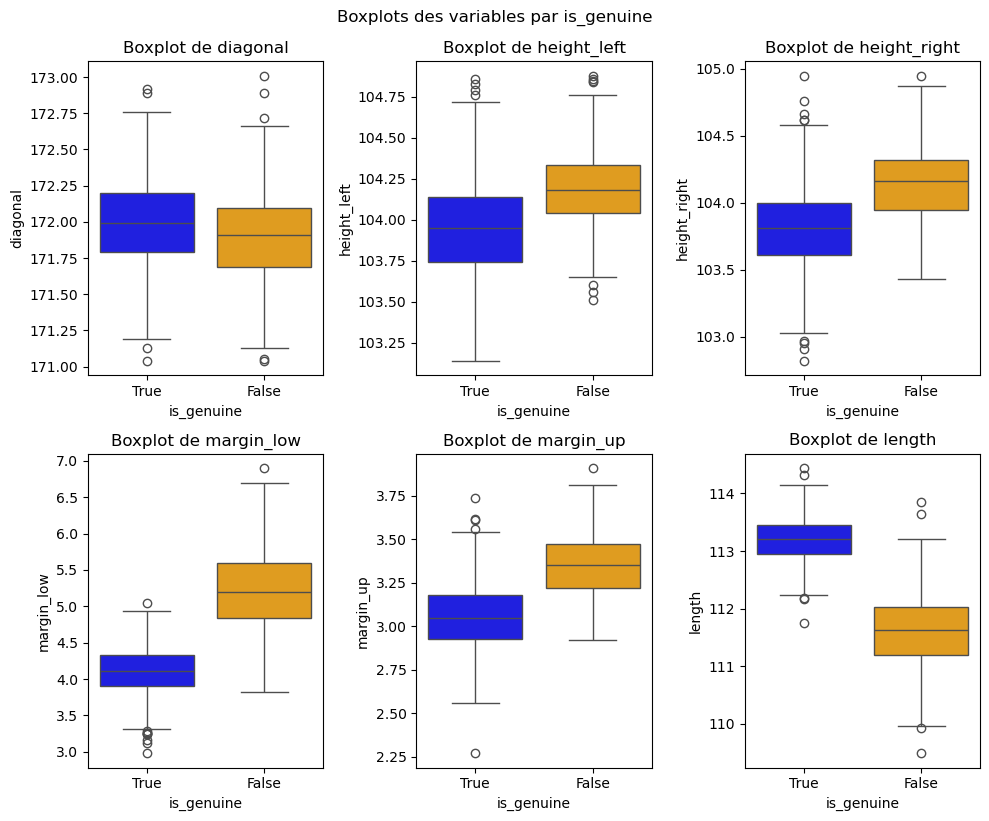

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Palette fixe
palette = {'True': 'blue', 'False': 'orange'}

# Nombre de variables
n = len(colonnes_a_convertir)

# Définir le nombre de lignes et colonnes (tu peux ajuster)
ncols = 3
nrows = (n + 1) // ncols

# Créer la figure
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 4 * nrows))

# Aplatir les axes pour pouvoir les parcourir facilement
axes = axes.flatten()

# Boucle pour créer les boxplots
for i, col in enumerate(colonnes_a_convertir):
    sns.boxplot(data=df_billets, x='is_genuine', y=col, palette=palette, ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")

# Supprimer les axes restants inutilisés
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Boxplots des variables par is_genuine", y=1.02)
plt.show()


## 3. Récuperation variable manquante
### 3.1 Régression linéaire

In [27]:
# Supprimer les lignes où margin_low est NaN
df_billets_sans_manquant = df_billets[df_billets['margin_low'].notnull()]

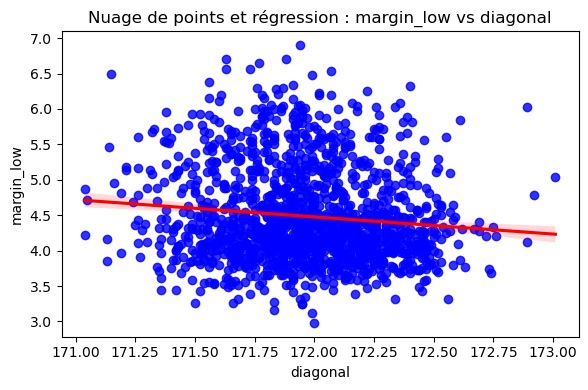

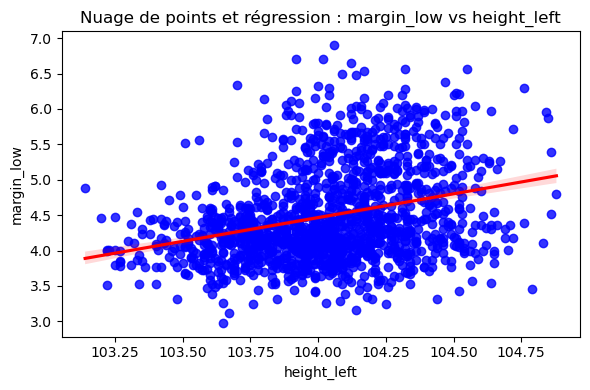

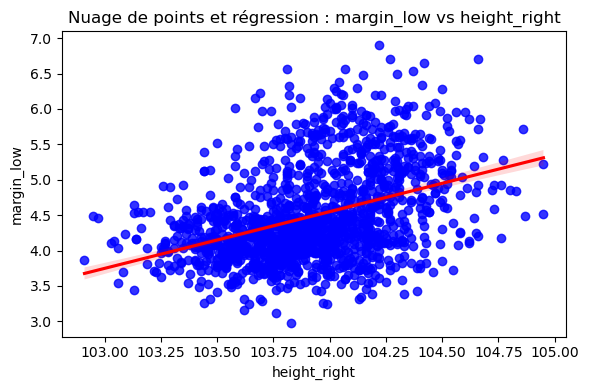

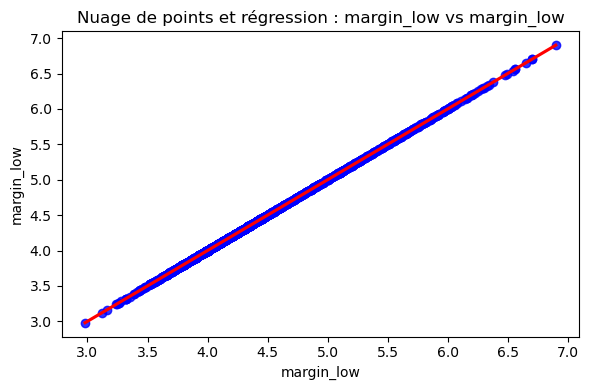

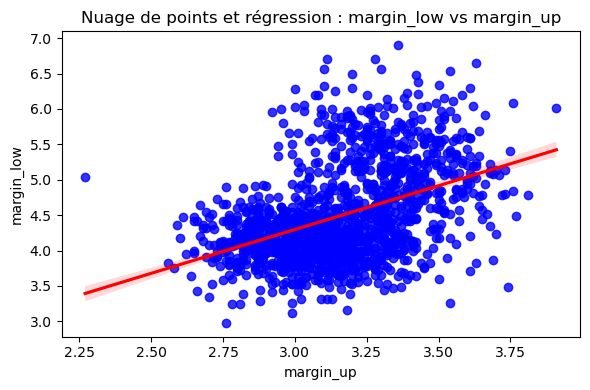

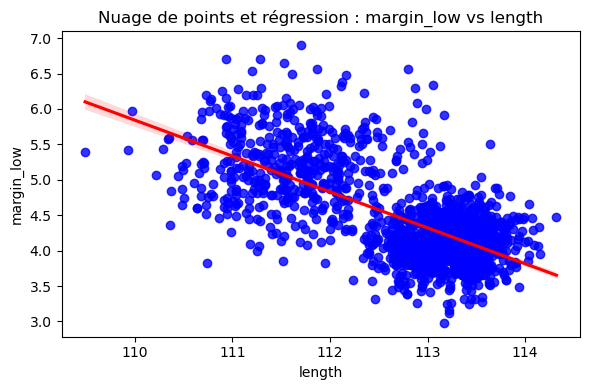

In [28]:
# Colonnes numériques
colonnes_numeriques = df_billets_sans_manquant.select_dtypes(include='number').columns

# Boucle sur chaque variable quantitative
for col in colonnes_numeriques:
    plt.figure(figsize=(6, 4))
    sns.regplot(data=df_billets_sans_manquant, x=col, y='margin_low', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
    plt.title(f"Nuage de points et régression : margin_low vs {col}")
    plt.tight_layout()
    plt.show()

In [29]:
# Sélectionner les colonnes dans 'colonnes_a_convertir' et 'margin_low'
df_subset = df_billets_sans_manquant[['margin_low'] + colonnes_a_convertir]

# Calculer la corrélation de Pearson entre 'margin_low' et les autres variables
correlation_margin_low = df_subset.corr()['margin_low']

# Affichage des corrélations
print(correlation_margin_low)


              margin_low  margin_low
margin_low      1.000000    1.000000
diagonal       -0.111534   -0.111534
height_left     0.302643    0.302643
height_right    0.391085    0.391085
margin_low      1.000000    1.000000
margin_up       0.431606    0.431606
length         -0.666753   -0.666753


In [30]:
#on va scinder notre dataset en une partie d'entraînement et une partie d'évaluation
X = df_billets_sans_manquant[['diagonal','height_left','height_right','margin_up','length']]
y = df_billets_sans_manquant.margin_low

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [31]:
reg = LinearRegression()

In [32]:
#On entraine le modele
reg.fit(X_train, y_train)

LinearRegression()

In [33]:
#ur estimer la performance sur le sous-ensemble de test il faut tout d'abord obtenir les prédictions pour X_test:
y_pred_test = reg.predict(X_test)

On peut maintenant calculer l'écart entre les vraies valeurs de test (y_test) et celles prédites par le modèle.
Utilisons la RMSE et la MAPE comme score. Pour ces 2 métriques, un score plus petit correspond à un meilleur modèle

In [34]:
# Calcul des métriques
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
mape = mean_absolute_percentage_error(y_test, y_pred_test)

# Affichage
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2%}")

RMSE: 0.44
MAPE: 7.47%


### 3.2 Amélioration des performances du modele avec l ajout de terme quadractile + scaling

### 3.2.1 Scaling

In [35]:
variables = ['diagonal','height_left','height_right','margin_up','length']

In [36]:
# Instancier le Scaler
scaler = MinMaxScaler()

# et l'appliquer 
data_array = scaler.fit_transform(df_billets_sans_manquant[variables])

# transformer le array en dataframe 
df_scaled = pd.DataFrame(data_array,  columns = variables)

# verifier que les min et max des variables sont tous 0 et 1
df_scaled.describe().loc[['min','max']]

diagonal  height_left  height_right  margin_up  length
min       0.0          0.0           0.0        0.0     0.0
max       1.0          1.0           1.0        1.0     1.0

In [37]:
# scindons les donnees en test et train
X = df_scaled[variables]
y = df_billets_sans_manquant.margin_low

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [38]:
# entrainons le modele
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [39]:
# Prediction sur le test set
y_pred_test = reg.predict(X_test)

# Scores
print(f"-- Regression ventes ~ diagonal + height_left + height_right + margin_up + length + margin_up")
print(f"\tRMSE: {mean_squared_error(y_test, y_pred_test)}")
print(f"\tMAPE: {mean_absolute_percentage_error(y_test, y_pred_test)}")

-- Regression ventes ~ diagonal + height_left + height_right + margin_up + length + margin_up
	RMSE: 0.19144954947493323
	MAPE: 0.07467677345733446


### 3.2.2 Creation la variable quadractile

In [40]:
df_billets_sans_manquant['margin_up2'] = df_billets_sans_manquant.margin_up**2
df_billets_sans_manquant['height_left2'] = df_billets_sans_manquant.height_left**2

C:\Users\damie\AppData\Local\Temp\ipykernel_16252\1071153084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_billets_sans_manquant['margin_up2'] = df_billets_sans_manquant.margin_up**2
C:\Users\damie\AppData\Local\Temp\ipykernel_16252\1071153084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_billets_sans_manquant['height_left2'] = df_billets_sans_manquant.height_left**2


In [41]:
variables1 = ['diagonal','height_left','height_right','margin_up','length','margin_up2']
variables2 = ['diagonal','height_left','height_right','margin_up','length','height_left2']

In [42]:
# Instancier le Scaler
scaler = MinMaxScaler()

# et l'appliquer 
data_array = scaler.fit_transform(df_billets_sans_manquant[variables1])
data_array = scaler.fit_transform(df_billets_sans_manquant[variables2])

# transformer le array en dataframe 
df_scaled1 = pd.DataFrame(data_array,  columns = variables1)
df_scaled2 = pd.DataFrame(data_array,  columns = variables2)

# verifier que les min et max des variables sont tous 0 et 1
df_scaled1.describe().loc[['min','max']]

diagonal  height_left  height_right  margin_up  length  margin_up2
min       0.0          0.0           0.0        0.0     0.0         0.0
max       1.0          1.0           1.0        1.0     1.0         1.0

In [43]:
df_scaled2.describe().loc[['min','max']]

diagonal  height_left  height_right  margin_up  length  height_left2
min       0.0          0.0           0.0        0.0     0.0           0.0
max       1.0          1.0           1.0        1.0     1.0           1.0

In [44]:
# scindons les donnees en test et train
X1 = df_scaled1[variables1]
X2 = df_scaled2[variables2]
y = df_billets_sans_manquant.margin_low

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.20, random_state=42)
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.20, random_state=42)

In [45]:
# entrainons les modeles
reg = LinearRegression()
reg.fit(X1_train, y_train)

LinearRegression()

In [46]:
# Prediction sur le test 1
y_pred_test = reg.predict(X1_test)

# Scores
print(f"-- Regression ventes ~ diagonal + height_left + height_right + margin_up + length + margin_up2")
print(f"\tRMSE: {mean_squared_error(y_test, y_pred_test)}")
print(f"\tMAPE: {mean_absolute_percentage_error(y_test, y_pred_test)}")

-- Regression ventes ~ diagonal + height_left + height_right + margin_up + length + margin_up2
	RMSE: 0.1918123619218775
	MAPE: 0.0747712851219945


In [47]:
# entrainons les modeles
reg = LinearRegression()
reg.fit(X2_train, y_train)

LinearRegression()

In [48]:
# Prediction sur le test 2
y_pred_test = reg.predict(X2_test)

# Scores
print(f"-- Regression ventes ~ diagonal + height_left + height_right + margin_up + length + lenght")
print(f"\tRMSE: {mean_squared_error(y_test, y_pred_test)}")
print(f"\tMAPE: {mean_absolute_percentage_error(y_test, y_pred_test)}")

-- Regression ventes ~ diagonal + height_left + height_right + margin_up + length + lenght
	RMSE: 0.1918123619218775
	MAPE: 0.0747712851219945


## 3.3 Afinons notre resultat avec les valeurs True et False
### 3.3.1 Vrai billet

In [49]:
#Création de df True 
df_billet_true = df_billets[df_billets['is_genuine'] == 'True'].dropna()
df_billet_true.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0       True    171.81       104.86        104.95        4.52       2.89   
1       True    171.46       103.36        103.66        3.77       2.99   
2       True    172.69       104.48        103.50        4.40       2.94   
3       True    171.36       103.91        103.94        3.62       3.01   
4       True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

In [50]:
# Instancier le Scaler
scaler = MinMaxScaler()

# et l'appliquer 
data_array = scaler.fit_transform(df_billet_true[variables])

# transformer le array en dataframe 
df_scaled = pd.DataFrame(data_array,  columns = variables)

# verifier que les min et max des variables sont tous 0 et 1
df_scaled.describe().loc[['min','max']]

diagonal  height_left  height_right  margin_up  length
min       0.0          0.0           0.0        0.0     0.0
max       1.0          1.0           1.0        1.0     1.0

In [51]:
# scindons les donnees en test et train
X = df_scaled[variables]
y = df_billet_true.margin_low

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [52]:
# entrainons le modele
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [53]:
# Prediction sur le test set
y_pred_test = reg.predict(X_test)

# Scores
print(f"-- Regression ventes ~ diagonal + height_left + height_right + margin_up + length + margin_up")
print(f"\tRMSE: {mean_squared_error(y_test, y_pred_test)}")
print(f"\tMAPE: {mean_absolute_percentage_error(y_test, y_pred_test)}")

-- Regression ventes ~ diagonal + height_left + height_right + margin_up + length + margin_up
	RMSE: 0.1050987495215651
	MAPE: 0.06459493678097578


### 3.3.2 Ajout des valeurs des billets "true" manquant

In [54]:
# Lignes billets vrais AVEC valeur manquante
true_nan = (df_billets['is_genuine'] == 'True') & (df_billets['margin_low'].isna())

# Sélection des colonnes quantitatives utilisées dans le modèle
variable_true_nan = df_billets.loc[true_nan, ['diagonal', 'height_left','height_right','margin_up','length']]  

In [55]:
# Vérification de la forme des données
print(variable_true_nan.shape)

(29, 5)


In [56]:
# Appliquer le scaler entraîné sur les nouvelles données
variable_true_nan_scaled = scaler.transform(variable_true_nan)

# Prédiction avec les données correctement normalisées
predicted_values = reg.predict(variable_true_nan_scaled)

D:\anaconda\envs\Openclass\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [57]:
# Insertion des valeurs 
df_billets.loc[true_nan, 'margin_low'] = predicted_values

In [58]:
df_billets.loc[true_nan, ['margin_low']]

margin_low
72     4.052330
99     4.109730
151    4.131052
197    4.007412
241    4.084479
251    4.080979
284    4.088618
334    4.127999
410    4.109240
413    4.089835
445    4.113002
481    4.196934
505    4.158667
611    4.039792
654    4.135415
675    4.175968
710    4.091758
739    4.073210
742    4.096805
780    4.135022
798    4.173062
844    4.141470
845    4.172036
871    4.086832
895    4.145158
919    4.189955
945    4.093654
946    4.071904
981    4.135365

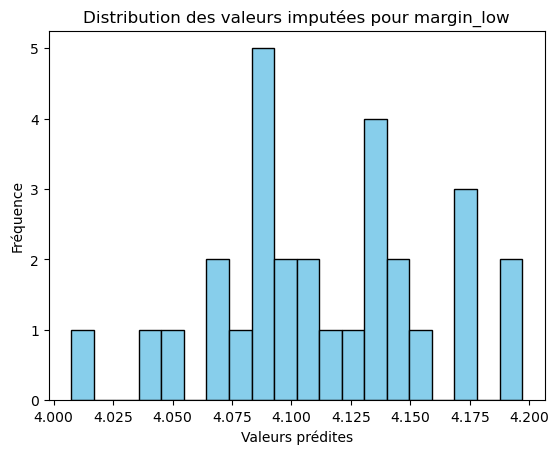

In [59]:
# Histogramme des valeurs prédites
plt.hist(df_billets.loc[true_nan, 'margin_low'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution des valeurs imputées pour margin_low")
plt.xlabel("Valeurs prédites")
plt.ylabel("Fréquence")
plt.show()

### 3.3.3 Faux billet

In [60]:
#Création de df false 
df_billet_false = df_billets[df_billets['is_genuine'] == 'False'].dropna()
df_billet_false.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
1000      False    172.28       103.95        103.91        4.78       3.31   
1001      False    171.92       103.86        104.30        4.96       3.13   
1002      False    171.59       104.14        104.38        4.97       3.47   
1003      False    172.02       104.33        104.33        5.19       3.21   
1004      False    172.55       104.25        104.23        5.60       3.13   

      length  
1000  111.40  
1001  111.29  
1002  111.22  
1003  111.99  
1004  111.72

In [61]:
# Instancier le Scaler
scaler = MinMaxScaler()

# et l'appliquer 
data_array = scaler.fit_transform(df_billet_false[variables])

# transformer le array en dataframe 
df_scaled = pd.DataFrame(data_array,  columns = variables)

# verifier que les min et max des variables sont tous 0 et 1
df_scaled.describe().loc[['min','max']]

diagonal  height_left  height_right  margin_up  length
min       0.0          0.0           0.0        0.0     0.0
max       1.0          1.0           1.0        1.0     1.0

In [62]:
# scindons les donnees en test et train
X = df_scaled[variables]
y = df_billet_false.margin_low

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [63]:
# entrainons le modele
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [64]:
# Prediction sur le test set
y_pred_test = reg.predict(X_test)

# Scores
print(f"-- Regression ventes ~ diagonal + height_left + height_right + margin_up + length + margin_up")
print(f"\tRMSE: {mean_squared_error(y_test, y_pred_test)}")
print(f"\tMAPE: {mean_absolute_percentage_error(y_test, y_pred_test)}")

-- Regression ventes ~ diagonal + height_left + height_right + margin_up + length + margin_up
	RMSE: 0.2771500925856835
	MAPE: 0.08290652331563783


### 3.3.4 Ajout des valeurs des billets "False" manquant

In [65]:
# Lignes billets vrais AVEC valeur manquante
false_nan = (df_billets['is_genuine'] == 'False') & (df_billets['margin_low'].isna())

# Sélection des colonnes quantitatives utilisées dans le modèle
variable_false_nan = df_billets.loc[false_nan, ['diagonal', 'height_left','height_right','margin_up','length']]

In [66]:
# Vérification de la forme des données
print(variable_false_nan.shape)

(8, 5)


In [67]:
# Appliquer le scaler entraîné sur les nouvelles données
variable_false_nan_scaled = scaler.transform(variable_false_nan)

# Prédiction avec les données correctement normalisées
predicted_values = reg.predict(variable_false_nan_scaled)

D:\anaconda\envs\Openclass\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [68]:
# Insertion des valeurs 
df_billets.loc[false_nan, 'margin_low'] = predicted_values

In [69]:
print(variable_false_nan.shape[0])           # ex. 17
print(len(predicted_values))                # ex. 0 ? ou autre ?


8
8


In [70]:
df_billets.loc[false_nan, ['margin_low']]

margin_low
1076    5.345435
1121    5.355686
1176    5.423934
1303    5.422535
1315    5.128826
1347    5.204599
1435    5.042068
1438    5.297923

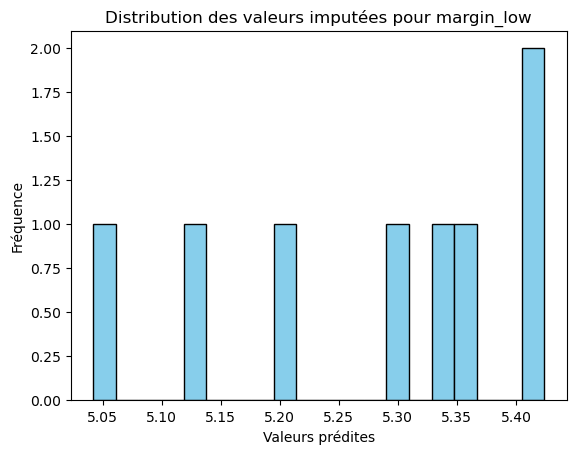

In [71]:
# Histogramme des valeurs prédites
plt.hist(df_billets.loc[false_nan, 'margin_low'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution des valeurs imputées pour margin_low")
plt.xlabel("Valeurs prédites")
plt.ylabel("Fréquence")
plt.show()

## 3.5 Visualisation des valeurs

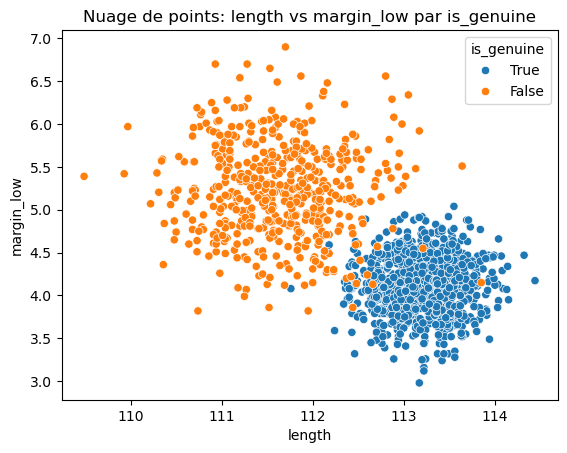

In [83]:
# Créer un seul nuage de points : length en x, margin_low en y, coloré par is_genuine
sns.scatterplot(data=df_billets, x='length', y='margin_low', hue='is_genuine')
plt.title("Nuage de points: length vs margin_low par is_genuine")
plt.show()


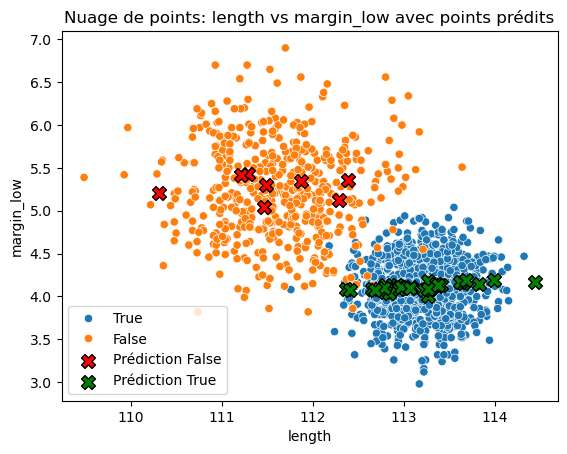

In [73]:
# 1. Nuage de points de base
sns.scatterplot(data=df_billets, x='length', y='margin_low', hue='is_genuine')

# 2. Ajouter les points prédits (margin_low imputé) en rouge et vert
# On suppose que false_nan et true_nan sont des masques booléens ou des index

# Rouge pour les faux billets
plt.scatter(
    df_billets.loc[false_nan, 'length'],
    df_billets.loc[false_nan, 'margin_low'],
    color='red',
    label='Prédiction False',
    edgecolor='black',
    s=100,
    marker='X'
)

# Vert pour les vrais billets
plt.scatter(
    df_billets.loc[true_nan, 'length'],
    df_billets.loc[true_nan, 'margin_low'],
    color='green',
    label='Prédiction True',
    edgecolor='black',
    s=100,
    marker='X'
)

# 3. Finaliser le graphique
plt.title("Nuage de points: length vs margin_low avec points prédits")
plt.legend()
plt.show()


## 4. Recupération du nouveau fichier df_billet

In [74]:
df_billets.to_csv("df_billets_modifie.csv", index=False)